In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
%run 4.3.2-common.ipynb

Principal values are tensor([9.3440e+03, 5.3373e+08])


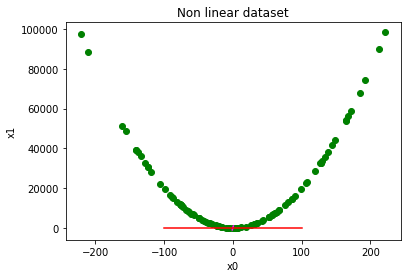

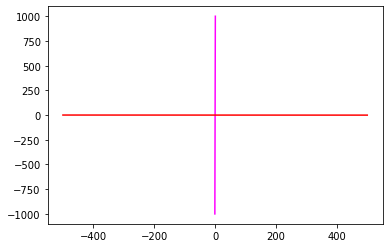

Mean loss in information: 68.48326873779297
 - high


In [3]:
N = 100

torch.manual_seed(42)

# Create a random data vector
x_0 = torch.normal(0, 100, (N,))

# Create a highly correlated non linear vector
# x1 = 2x^2. Then, add random noise to it.
x_1 = 2 * (x_0 ** 2) + torch.normal(0, 5, (N,))

# Create data matrix with x_0, x_1 as columns.
X = torch.column_stack((x_0, x_1))

# Perform PCA
principal_values, principal_components = pca(X)

principal_values = principal_values.real
principal_components = principal_components.real

print("Principal values are {}".format(principal_values))

# Plot the pair of values as X and Y axes.
# Because of the correlation, the points will
# *not* be spread uniformly over the X-Y plane.
# They will form a cluster around the curve
# y = 2x^2.
# The principal axis will not capture underlying
# pattern of the non-linear data.
plt.figure()
plt.scatter(X[:, 0], X[: , 1], color="green")
plt.title('Non linear dataset')
plt.xlabel('x0')
plt.ylabel('x1')

major_index = torch.argmax(principal_values)
minor_index = torch.argmin(principal_values)

draw_line(principal_components[:, major_index].numpy(),
          min_x=-1000, max_x=1000)
draw_line(principal_components[:, minor_index].numpy(),
          min_x=-100, max_x=100, color="red")
plt.show()

draw_line(principal_components[:, major_index].numpy(),
          min_x=-1000, max_x=1000)
draw_line(principal_components[:, minor_index].numpy(),
          min_x=-500, max_x=500, color="red")
plt.show()


# If we perform dimensionality reduction in this case,
# there will be lots of loss in information.
first_princpal_vec = principal_components[:,
                                         major_index]
first_princpal_vec = first_princpal_vec.reshape((-1,
                                                 1))
X_proj = torch.matmul(X, first_princpal_vec)
X_back_proj = torch.matmul(X_proj,
                     torch.linalg.pinv(first_princpal_vec)) 
info_loss = torch.sqrt(torch.mean((X_back_proj - X)**2))
print("Mean loss in information: {}\n - high".\
      format(info_loss))